In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
#reading file from NVDA data downloaded from Yahoo 
NVDA_df = pd.read_csv("NVDA.csv")
NVDA_df["Date"] = NVDA_df["Date"].astype("datetime64")
NVDA_df = NVDA_df.set_index("Date")

In [3]:
df = NVDA_df.Close
df.head()

Date
2019-10-18    47.622501
2019-10-21    49.002499
2019-10-22    48.902500
2019-10-23    48.772499
2019-10-24    49.215000
Name: Close, dtype: float64

In [4]:
#using the adfuller test to see if series is stationary
result = adfuller(df.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.733194
p-value: 0.414096


In [5]:
#Given that p-value is greater than 0.05 (level of significance), we try to find order of differencing needed to achieve stationarity


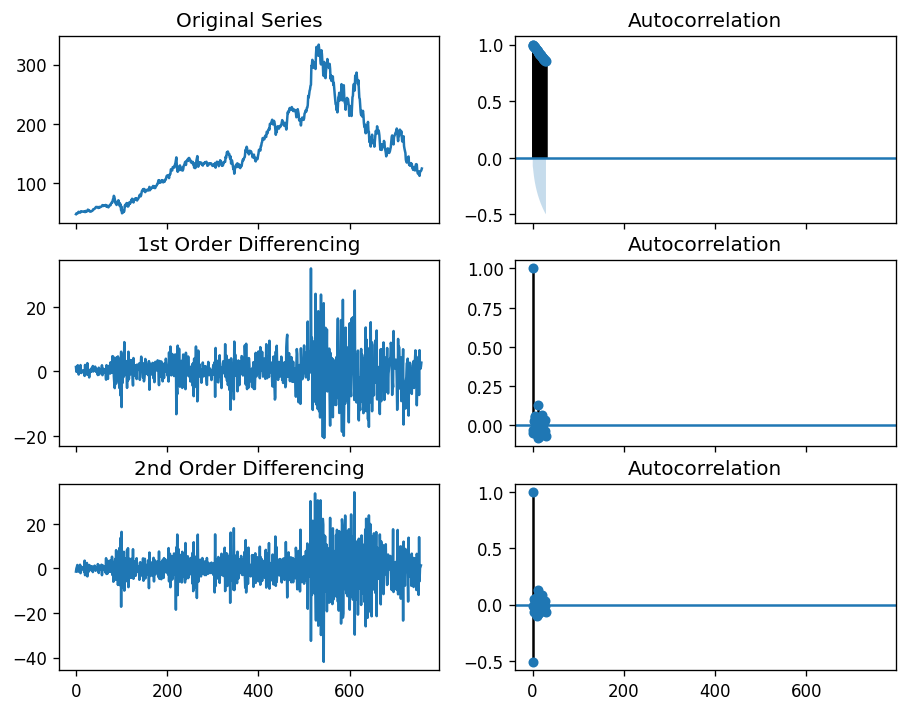

In [6]:

#set plot paras
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
#3 by 2 subplot
fig, axes = plt.subplots(3, 2, sharex=True)
#comparing original series and respective autocorrelation
axes[0, 0].plot(df.values); axes[0, 0].set_title('Original Series')
plot_acf(df.values, ax=axes[0, 1])

#after differencing once, plotting autocorrelation
diff1 = np.diff(df.values)
# 1st Differencing
axes[1, 0].plot(diff1); axes[1, 0].set_title('1st Order Differencing')
plot_acf(diff1, ax=axes[1, 1])

#after differencing twice, plotting autocorrelation
diff2 = np.diff(diff1)
# 2nd Differencing
axes[2, 0].plot(diff2); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(diff2, ax=axes[2, 1])


plt.show()

In [7]:
#Time series reaches stationarity with 1 order of differencing i.e d = 1


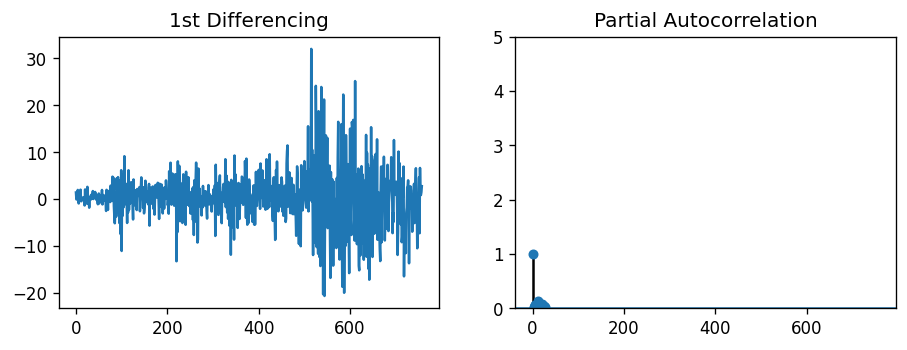

In [8]:
#plotting a partial autocorrelation graph to find value to set p to
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff1); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(diff1, ax=axes[1])

plt.show()

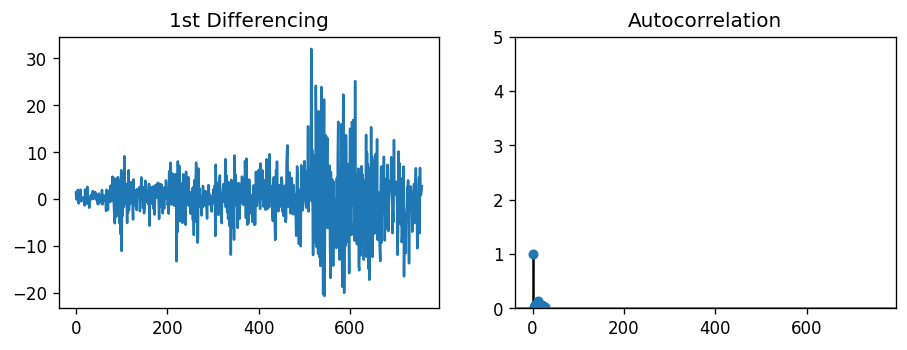

In [9]:
#plotting a autocorrelation graph to find value to set q to
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff1); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_acf(diff1, ax=axes[1])

plt.show()

Should be sufficient to set p = 1, q = 1 as both the pacf and acf plots have only lag 1 at any significant value

In [ ]:
#setting up the arima model
model = ARIMA(df.values, order=(1,1,1))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

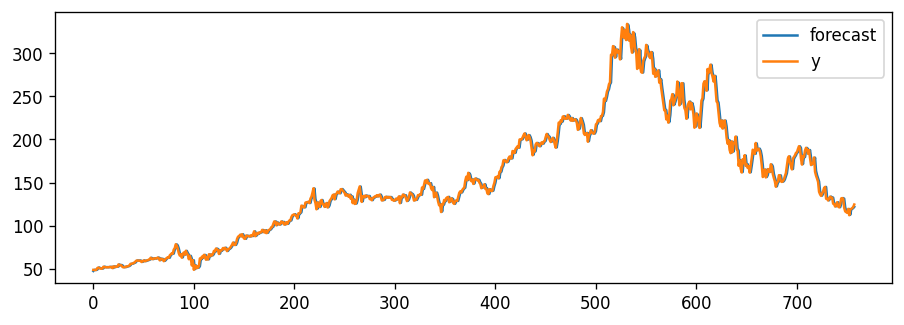

In [11]:
#looking at its prediction, and seeing how close it is to actual (its very close, overfit?)
model_fit.plot_predict(dynamic=False)
plt.show()

In [12]:
#creating train and test dataframes so that we can use it to test forecasting ability
df = NVDA_df.Close
train = df[:650]
test = df[650:]
len(test)

109

In [ ]:
# Build Model

model = ARIMA(train, order=(1, 2, 1))  #changed d = 2 since it seemed to have better results
fitted = model.fit(disp=-1)  

# Forecast with 95% confidence
fc, se, conf = fitted.forecast(len(df) - 650, alpha=0.05) 

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#rebuilding model for final forecasting 
model_final = ARIMA(df, order=(1, 2, 1))  #changed d = 2 since it seemed to have better results
fitted_final = model_final.fit(disp=-1)  

final_results, se, conf = fitted_final.forecast(14, alpha=0.05) 

In [ ]:
#array of 14 results (end on 4th Nov)
final_results

In [16]:
#picking the dates of interest
results = final_results[-10:]
dates = ['2022-10-24','2022-10-25','2022-10-26', '2022-10-27','2022-10-28', '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04' ]

In [17]:
#writing to csv
to_submit = pd.DataFrame(results,  columns = ['Close'])
to_submit.rename_axis('Date', inplace=True)
to_submit.to_csv("Implementation_2.csv")